In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Torab al-ghoraba,1998
1,Long zai tian ya,1989
2,Jewtopia,2012
3,Baby Face,1959
4,The Lucky Break,2014


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [15]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year','character']).size()
c = c.unstack()
c = c.fillna(0)
d = c.Superman - c.Batman
print('Superman year:')
len(d[d>0]);

Superman year:


C:\Users\Ruiye\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [13]:
print('Batman year:')
len(d[d<0])

Batman year:


23

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

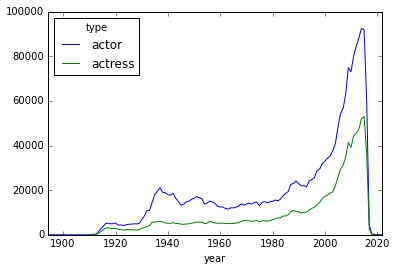

In [22]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type')
c.plot()


### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

C:\Users\Ruiye\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


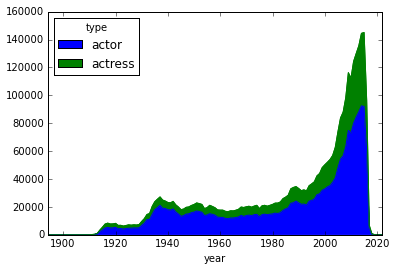

In [26]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type')
c.plot(kind = 'area')


### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

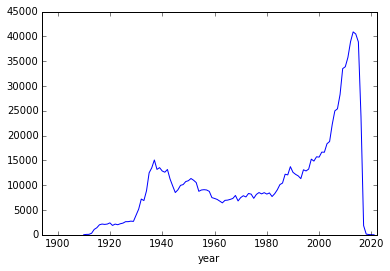

In [6]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()


### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

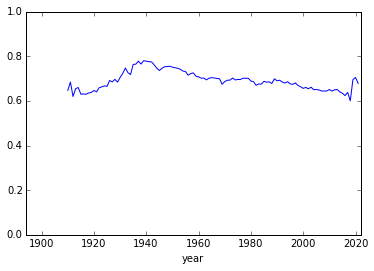

In [7]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type')
(c.actor/(c.actor + c.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

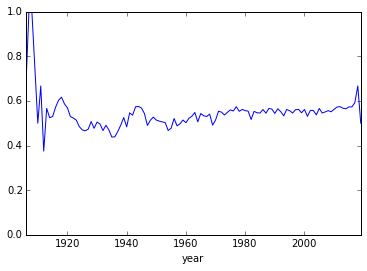

In [45]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0)
(c.actor/(c.actor + c.actress)).plot(ylim = [0,1])


### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

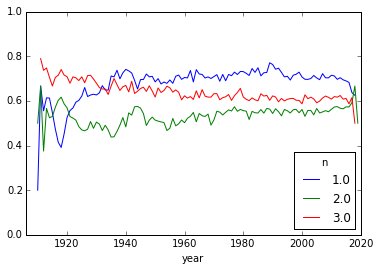

In [56]:
c = cast
c = c[c.n<=3]
c = c.groupby(['year','type','n']).size()
c = c.unstack('type')
d = c.actor/(c.actor + c.actress)
d.unstack('n').plot(ylim=[0,1])